## Project: Breast Cancer Classification with SVM

### Cancer remains one of the most significant health challenges worldwide. Early and accurate detection is crucial for effective treatment and improved patient outcomes. Machine learning, specifically Support Vector Machine (SVM), offers a powerful tool for classifying cancerous and healthy tissues based on various biomarkers. This project aims to build an SVM model to classify samples as either cancerous or healthy using Python.

### Dataset
The dataset used in this project is the one obtained after PCA Reduced Features, available as **important_features_dataset.csv** .

In [1]:
#### Import Libraries

import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#### Load and Explore Data

# Load the dataset
df = pd.read_csv('important_features_dataset.csv')


# Display the first few rows of the dataset
print(df.head())


   mean concave points  mean fractal dimension  texture error  worst texture  \
0              0.14710                 0.07871         0.9053          17.33   
1              0.07017                 0.05667         0.7339          23.41   
2              0.12790                 0.05999         0.7869          25.53   
3              0.10520                 0.09744         1.1560          26.50   
4              0.10430                 0.05883         0.7813          16.67   

   mean smoothness  worst symmetry  worst fractal dimension  target  
0          0.11840          0.4601                  0.11890       0  
1          0.08474          0.2750                  0.08902       0  
2          0.10960          0.3613                  0.08758       0  
3          0.14250          0.6638                  0.17300       0  
4          0.10030          0.2364                  0.07678       0  


In [3]:
#### Preprocess Data

# Split data into features and target
X = df.drop(columns='target')
y = df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
#### Build and Train SVM Model

# Create an SVM model
svm_model = SVC(kernel='linear', C=10.0, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(C=10.0, kernel='linear', random_state=42)

In [5]:
#### Evaluate the Model

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



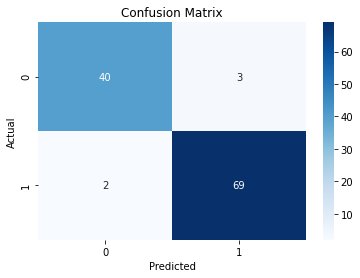

In [6]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Our model predicted ‘0’ correctly 40 times while predicting ‘0’ incorrectly 2 times
### Also it predicted ‘1’ incorrectly 3 times while predicting ‘1’ correctly 69 times

## Conclusions
### In this project, we successfully built an SVM model to classify cancerous and healthy samples. Our model achieved an accuracy of 96%, indicating strong performance. The confusion matrix and classification report further demonstrated the model's ability to accurately distinguish between cancerous and healthy samples.

### Analyzing feature importances

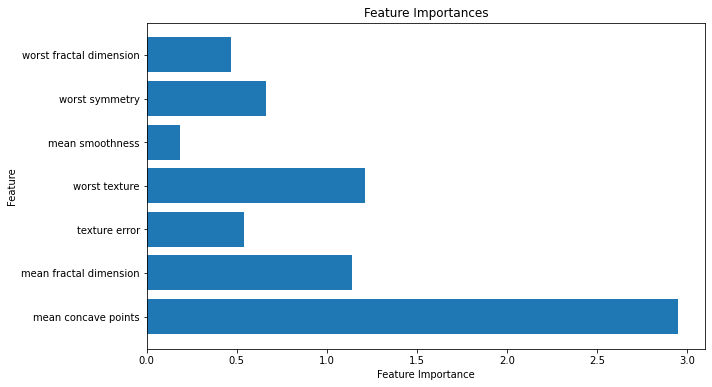

In [7]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(df.columns[:-1], np.abs(svm_model.coef_[0]))
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

### Higher Bar: Features with higher bar lengths are more important for the model, meaning they have a larger influence on the model's predictions.

### Pairwise Feature Scatter Plots: Select a subset of features (e.g., the most important ones) and create pairwise scatter plots to visualize the relationship between them and the target variable.

<ipython-input-8-949d19049b00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['target'] = df_subset['target'].map({0: target_names[0], 1: target_names[1]})


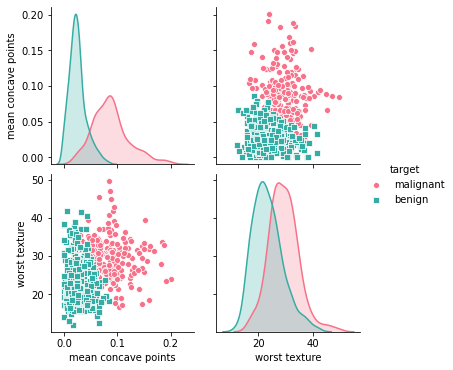

In [8]:
# Create a DataFrame with the two features and the target variable
df_subset = df[['mean concave points', 'worst texture', 'target']]

# Map target values to their corresponding labels
target_names = ['malignant', 'benign']
df_subset['target'] = df_subset['target'].map({0: target_names[0], 1: target_names[1]})

# Create pairwise scatter plots
sns.pairplot(df_subset, hue='target', markers=['o', 's'], palette='husl')
plt.show()

In [9]:
## Save the SVM model

from joblib import dump, load

# Save the trained model to an HDF5 file
dump(svm_model, 'svm-reduced-features_model.h5')

['svm-reduced-features_model.h5']

### Cross-Validation

In [10]:
#### Perform Cross-Validation
# Perform 5-fold cross-validation

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}')


Cross-Validation Accuracy: 0.94 ± 0.02


### The cross-validation accuracy of 0.94±0.02 suggests that your model's performance is consistent across different subsets of the data and is quite close to the test accuracy of 0.96. This indicates that your model is generalizing well and is not significantly overfitting.